# ONLINE BOOK RECOMMENDER SYSTEM

## Introduction

## Problem Statement

## Objectives

- **Clean and explore the dataset** to handle missing values, standardize formats, and uncover insights about users, books, and ratings or give a pipeline approach for example ; **Establish a robust data pipeline** to ingest, clean, and structure raw user and book data for analysis and modeling.


- **Build a collaborative filtering model** to recommend books by identifying patterns in user ratings and preferences.


- **Develop a content-based filtering system** that leverages book metadata (e.g., author, genre) for similarity-based recommendations


- **Design a hybrid recommendation engine** combining collaborative and content-based methods to improve accuracy and diversity.


- **Optimize and validate the system** using evaluation metrics (RMSE like listed above) and iterative model tuning.


- **Deploy a dynamic recommendation feature** that updates suggestions in real-time based on new user interactions.



## Data Limitations

# Data Understanding

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Read the dataset in the notebook

In [2]:
# books_df = pd.read_csv(r'C:\Users\hp\Desktop\DATA NEXUS PROJECTS\Online-Book-Recommender-System\books_df.csv', encoding='latin1')


# books_df.head()

In [3]:
import pandas as pd

books_df = pd.read_csv(
    r'C:\Users\hp\Desktop\DATA NEXUS PROJECTS\Online-Book-Recommender-System\books_df.csv',
    sep=';',
    quotechar='"',
    encoding='latin1',
    on_bad_lines='skip' 
)

books_df.head()


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
import pandas as pd

ratings_df = pd.read_csv(
    r'C:\Users\hp\Desktop\DATA NEXUS PROJECTS\Online-Book-Recommender-System\ratings_df.csv',
    sep=';',
    quotechar='"',
    encoding='latin1',
    on_bad_lines='skip'  
)

ratings_df.head()


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
import pandas as pd

user_df = pd.read_csv(
    r'C:\Users\hp\Desktop\DATA NEXUS PROJECTS\Online-Book-Recommender-System\user_df.csv',
    sep=';',
    quotechar='"',
    encoding='latin1',
    on_bad_lines='skip'  
)

user_df.head()


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


# Books Dataset

In [6]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
books_df.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...,http://images.amazon.com/images/P/0767409752.0...


In [8]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [9]:
books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [10]:
books_df.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [11]:
books_df.shape

(271360, 8)

# Ratings Dataset

In [12]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [13]:
ratings_df.tail()

,User-ID,ISBN,Book-Rating
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10
1149779,276723,05162443314,8


In [14]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [15]:
ratings_df.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [16]:
ratings_df.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [17]:
ratings_df.shape

(1149780, 3)

# User Dataset

In [18]:
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [19]:
user_df.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [20]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [21]:
user_df.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [22]:
user_df.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

In [23]:
user_df.shape

(278858, 3)

# Data Cleaning

## Books Dataset

In [24]:
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [25]:
books_df.dropna(inplace=True)

In [26]:
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

## Ratings Dataset

In [27]:
ratings_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

## Users Dataset

In [28]:
user_df['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

In [29]:
user_df.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [30]:
user_df['Age'].isna().value_counts()

False    168096
True     110762
Name: Age, dtype: int64

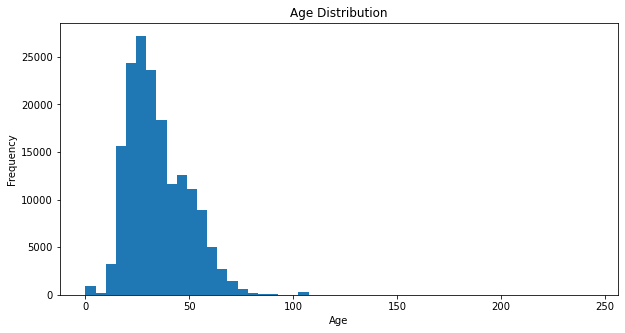

In [31]:
import matplotlib.pyplot as plt

user_df['Age'].plot(kind = 'hist',bins=50, figsize=(10,5), title='Age Distribution')
plt.xlabel('Age')
plt.show()

In [32]:
# Fill missing Age values
user_df['Age'] = user_df['Age'].fillna(user_df['Age'].median())

# Recalculate IQR on the filled column
Q1 = user_df['Age'].quantile(0.25)
Q3 = user_df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
user_df = user_df[(user_df['Age'] >= lower_bound) & (user_df['Age'] <= upper_bound)]
user_df.isna().sum()

User-ID     0
Location    0
Age         0
dtype: int64

## Merge Datasets

In [33]:
# Merge ratings with books on 'ISBN'
ratings_books_merged = pd.merge(ratings_df, books_df, on='ISBN', how='inner')

# Merge the result with users on 'User-ID'
merged_df = pd.merge(ratings_books_merged, user_df, on='User-ID', how='inner')
merged_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",32.0
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,"cincinnati, ohio, usa",23.0


In [34]:
merged_df.shape

(795508, 12)

In [35]:
merged_df.isna().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
Location               0
Age                    0
dtype: int64

In [36]:
merged_df['Location'].sample(50)

219712                   seattle, washington, usa
60183                    madison, new jersey, usa
772733                       iowa city, iowa, usa
727249                        tampa, florida, usa
78573                      duluth, minnesota, usa
146115                  ginsheim, hessen, germany
736561                        houston, texas, usa
97612                        omaha, nebraska, usa
646353                college station, texas, usa
608885                     norfolk, virginia, usa
645329            london, england, united kingdom
335516                   lemoore, california, usa
674098                      portland, oregon, usa
395840                    o`fallon, missouri, usa
168491                       astoria, oregon, usa
60511            mechanicsburg, pennsylvania, usa
757613                         austin, texas, usa
587794                          kearns, utah, usa
637890                  aberdeen, new jersey, usa
709840                 sharon, massachusetts, usa


In [37]:
# Split the Location column into parts (up to 3)
location_split = merged_df['Location'].str.split(',', n=2, expand=True)

# Rename columns based on position
location_split.columns = ['City', 'State', 'Country']

# Strip whitespace
location_split = location_split.apply(lambda col: col.str.strip())

# Fill missing values with 'Unknown'
location_split = location_split.fillna('Unknown')

# Merge back with original dataframe
merged_df = merged_df.join(location_split)
merged_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age,City,State,Country
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",32.0,tyler,texas,usa
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"cincinnati, ohio, usa",23.0,cincinnati,ohio,usa
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,http://images.amazon.com/images/P/0812533550.0...,"cincinnati, ohio, usa",23.0,cincinnati,ohio,usa
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,http://images.amazon.com/images/P/0679745580.0...,"cincinnati, ohio, usa",23.0,cincinnati,ohio,usa
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,http://images.amazon.com/images/P/0060173289.0...,"cincinnati, ohio, usa",23.0,cincinnati,ohio,usa


In [40]:
merged_df['City'].sample(10)

329690    west sacramento
490490       gaithersburg
159459        little rock
444603             gilroy
624879           anderson
672561    hoffman estates
301555        saint louis
112025         charleston
306860          sheffield
475121            olympia
Name: City, dtype: object

In [41]:
merged_df['State'].sample(10)

231702        new jersey
57616           maryland
66330           illinois
215630        california
27617            england
75851          minnesota
316735        washington
149503      saskatchewan
721250    north carolina
286108     massachusetts
Name: State, dtype: object

In [42]:
merged_df['Country'].sample(10)

530277         australia
555598               usa
613439               usa
686142               usa
207375               usa
509944               usa
129749               usa
693957               usa
307102          portugal
477501    united kingdom
Name: Country, dtype: object

In [63]:
# merged_df['Country'].unique()

# Exploratory Data Analysis

## Univariate Analysis

### Book Rating

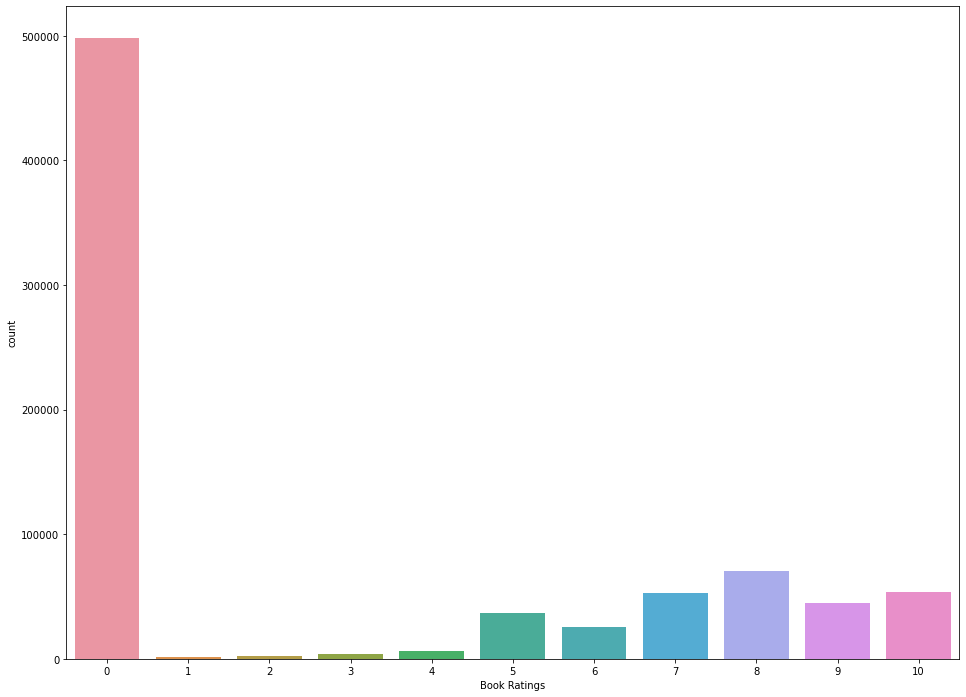

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 12))
sns.countplot(x=merged_df['Book-Rating'])
plt.xlabel('Book Ratings')
plt.show()

### Age

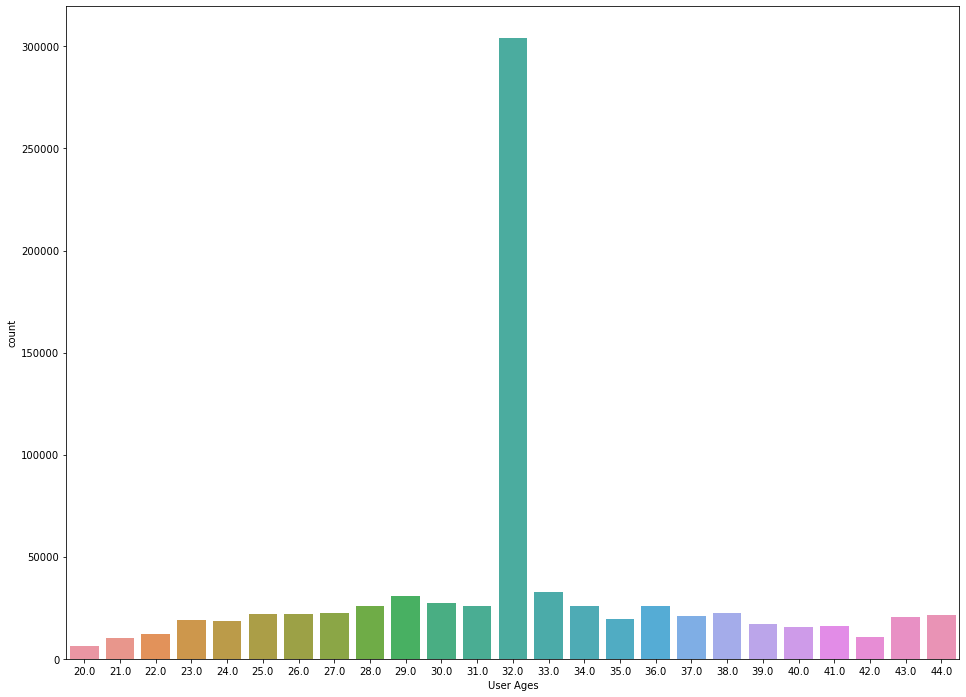

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 12))
sns.countplot(x=merged_df['Age'])
plt.xlabel('User Ages')
plt.show()

In [72]:
# merged_df['Publisher'] = merged_df['Publisher'].str.replace(r'[^a-zA-Z0-9 &]', '', regex=True)


# Bivariate Analysis

### Top 20 States By Users

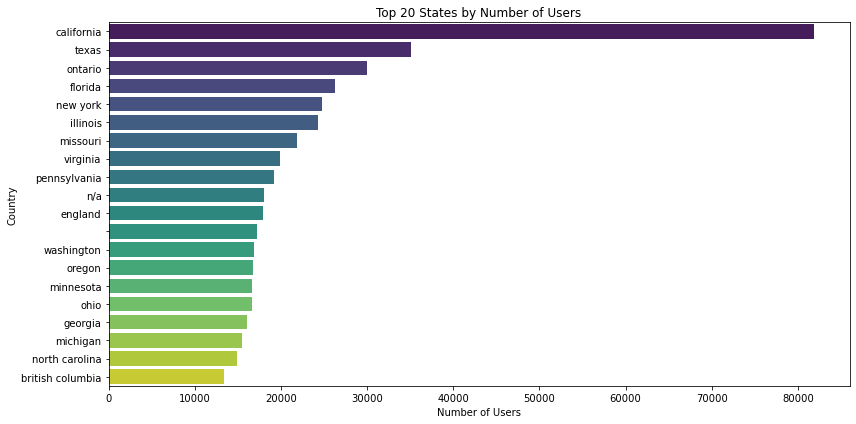

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count users per country
state_counts = merged_df['State'].value_counts().head(20)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.values, y=state_counts.index, palette='viridis')

plt.title('Top 20 States by Number of Users')
plt.xlabel('Number of Users')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


### User Distribution By Country

In [64]:
import plotly.express as px

country_data = merged_df['Country'].value_counts().reset_index()
country_data.columns = ['Country', 'Count']

fig = px.choropleth(
    country_data,
    locations='Country',
    locationmode='country names',
    color='Count',
    color_continuous_scale='Turbo',
     range_color=(0, 900),
    title='User Distribution by Country'
)
fig.show()
